## Dependencies

In [ ]:
# %pip install datasets
# %pip install matplotlib

  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.8 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.6 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-12.0.0-cp313-cp313-macosx_11_0_arm64.whl (4.7 MB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.1.1 -

## Import

In [152]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [5]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("hishab/hishab-pr-bn-v1")

/Users/shakil/Downloads/Todo SoftDev/bangla sentence punctuation restoration/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 2000/2000 [00:00<00:00, 172743.72 examples/s]


In [127]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['conversations', 'source', 'score'],
        num_rows: 2000
    })
})


In [128]:
df = ds["train"]
print(df)
# print(f"Features: {df.features}")

Dataset({
    features: ['conversations', 'source', 'score'],
    num_rows: 2000
})


In [129]:
for name, features in df.features.items():
    print(f"{name}: {features}")

conversations: List({'from': Value('string'), 'value': Value('string')})
source: Value('string')
score: Value('float64')


In [137]:
unique_conversation_len = {len(item) for item in df["conversations"]}
print(unique_conversation_len)
print({item[0]['from'] for item in df["conversations"]})
print({item[1]['from'] for item in df["conversations"]})

{2}
{'human'}
{'gpt'}


In [150]:
scores = [item for item in df['score']]
scores = np.array(scores)
print(f"scores min: {scores.min()}")
print(f"scores max: {scores.max()}")
print(f"scores mean: {scores.mean()}")

scores min: 1.01
scores max: 10.0
scores mean: 5.513109999999999


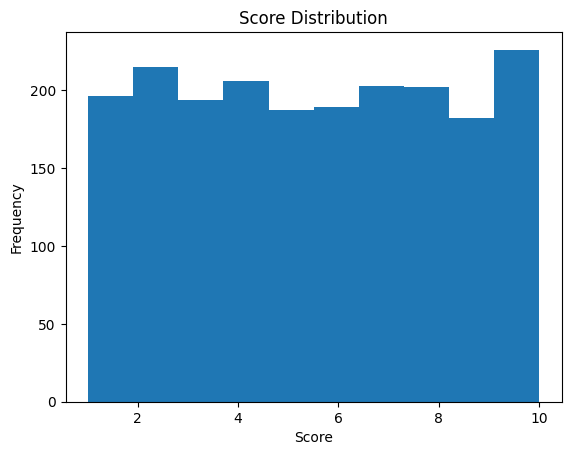

In [218]:
scores = list(df["score"])

plt.figure()
plt.hist(scores)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution")
plt.show()


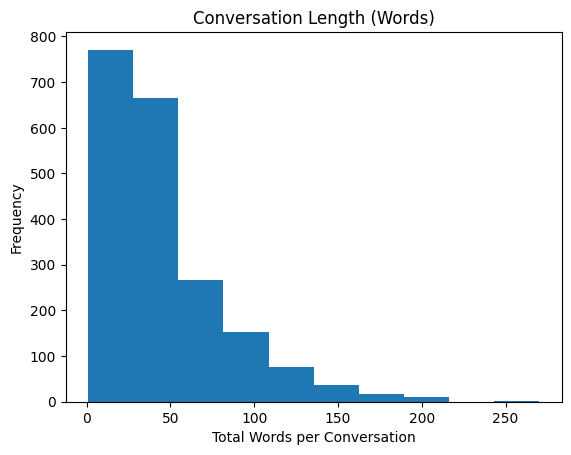

In [217]:
word_lens = [
    sum(len(turn["value"].split()) for turn in conv)
    for conv in df["conversations"]
]

plt.figure()
plt.hist(word_lens)
plt.xlabel("Total Words per Conversation")
plt.ylabel("Frequency")
plt.title("Conversation Length (Words)")
plt.show()


In [206]:
human_conv_len = [
    len(conv[0]["value"].split())
    for conv in df["conversations"]
]

human_conv_len = np.array(human_conv_len)
human_conv_len = np.sort(human_conv_len)
print(human_conv_len)
human_conv_len.min(), human_conv_len.max(), human_conv_len.mean()

[  0   0   0 ... 106 128 135]


(np.int64(0), np.int64(135), np.float64(22.6255))

In [ ]:
empty_human_indices = [
    i for i, conv in enumerate(df["conversations"])
    if len(conv[0]["value"].split()) <= 0
]

print("Number of empty human inputs:", len(empty_human_indices))
print("Indices of empty human inputs:", empty_human_indices)

print(df[empty_human_indices[:]])


Number of empty human inputs: 5
Indices of empty human inputs: [910, 1168, 1660, 1761, 1779]
{'conversations': [[{'from': 'human', 'value': ''}, {'from': 'gpt', 'value': '"'}], [{'from': 'human', 'value': ''}, {'from': 'gpt', 'value': '"'}], [{'from': 'human', 'value': ''}, {'from': 'gpt', 'value': '"'}], [{'from': 'human', 'value': ''}, {'from': 'gpt', 'value': '"'}], [{'from': 'human', 'value': ''}, {'from': 'gpt', 'value': '"'}]], 'source': ['synthetic_data', 'synthetic_data', 'synthetic_data', 'synthetic_data', 'synthetic_data'], 'score': [9.82, 4.3, 4.39, 5.12, 3.02]}
